# KMeans Clustering
This notebook demonstrates the implementation of the KMeans clustering algorithm using the "Mall Customers" dataset. The steps include loading the data, feature selection, normalization, and the iterative clustering process. Finally,Ie analyze the results and visualize the clusters.


# Loading and Preparing Data

In [1]:
import pandas as pd
import numpy as np

# Loading the dataset
file_path = 'Mall_Customers.csv'
data = pd.read_csv(file_path)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [16]:
# Selecting relevant columns for clustering
features_name = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
features = data[features_name].values

# Normalizing the features
def normalize_data(data):
    """
    Normalizes the dataset to have values between 0 and 1.
    """
    return (data - np.min(data, axis=0)) / (np.max(data, axis=0) - np.min(data, axis=0))

normalized_features = normalize_data(features)
normalized_features[:5]


array([[0.01923077, 0.        , 0.3877551 ],
       [0.05769231, 0.        , 0.81632653],
       [0.03846154, 0.00819672, 0.05102041],
       [0.09615385, 0.00819672, 0.7755102 ],
       [0.25      , 0.01639344, 0.39795918]])

# KMeans Implementation

In [3]:
def calculate_distance(point, centroids):
    """
    Calculate the Euclidean distance between a point and all centroids.
    
    Parameters:
    - point: A single data point (1D array).
    - centroids: An array of centroid coordinates (2D array).
    
    Returns:
    - Distances: A 1D array of distances from the point to each centroid.
    """
    return np.sqrt(np.sum((point - centroids) ** 2, axis=1))

# Testing the function with a sample data
sample_point = normalized_features[0]
sample_centroids = np.array([[0.2, 0.4, 0.3], [0.6, 0.8, 0.7]])
distances = calculate_distance(sample_point, sample_centroids)
distances


array([0.44763654, 1.03672068])

In [4]:
def assign_clusters(data, centroids):
    """
    Assign each data point to the nearest centroid.
    
    Parameters:
    - data: A 2D array of data points.
    - centroids: A 2D array of centroid coordinates.
    
    Returns:
    - labels: A 1D array of cluster labels for each data point.
    """
    labels = []
    for point in data:
        distances = calculate_distance(point, centroids)
        labels.append(np.argmin(distances))  # Index of the nearest centroid
    return np.array(labels)

# Testing the function with a sample data
test_centroids = np.array([[0.2, 0.4, 0.3], [0.6, 0.8, 0.7]])
cluster_labels = assign_clusters(normalized_features, test_centroids)
cluster_labels[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [5]:
def update_centroids(data, labels, k):
    """
    Update centroid positions based on the mean of assigned data points.
    
    Parameters:
    - data: A 2D array of data points.
    - labels: A 1D array of cluster labels for each data point.
    - k: Number of clusters.
    
    Returns:
    - new_centroids: A 2D array of updated centroid coordinates.
    """
    new_centroids = []
    for cluster in range(k):
        cluster_points = data[labels == cluster]
        if len(cluster_points) > 0:
            new_centroids.append(np.mean(cluster_points, axis=0))
        else:
            # If a cluster has no points assigned, retain the original centroid
            new_centroids.append(np.random.random(data.shape[1]))

    return np.array(new_centroids)

# Testing the function with a sample data
test_labels = np.random.choice([0, 1], size=normalized_features.shape[0])
updated_centroids = update_centroids(normalized_features, test_labels, k=2)
updated_centroids

array([[0.40672178, 0.36463919, 0.49647149],
       [0.39433416, 0.3835713 , 0.50844854]])

In [6]:
def has_converged(old_centroids, new_centroids, tol):
    """
    Check if centroids have converged based on the tolerance value.
    
    Parameters:
    - old_centroids: A 2D array of centroids from the previous iteration.
    - new_centroids: A 2D array of updated centroids.
    - tol: Convergence tolerance (float).
    
    Returns:
    - True if centroids have converged, False otherwise.
    """
    distances = np.sqrt(np.sum((old_centroids - new_centroids) ** 2, axis=1))
    return np.all(distances <= tol)

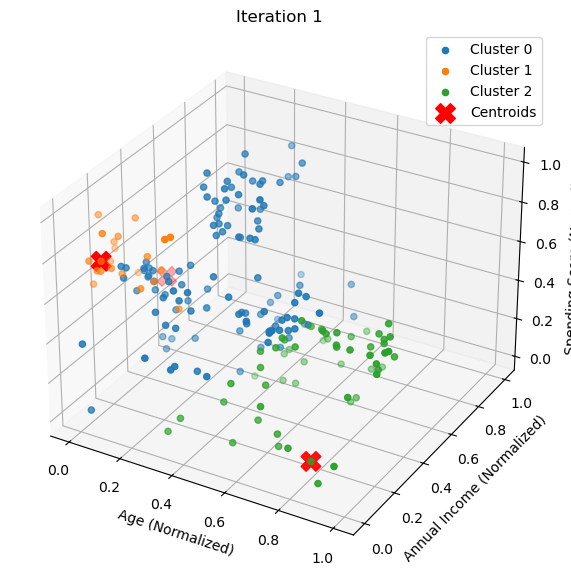

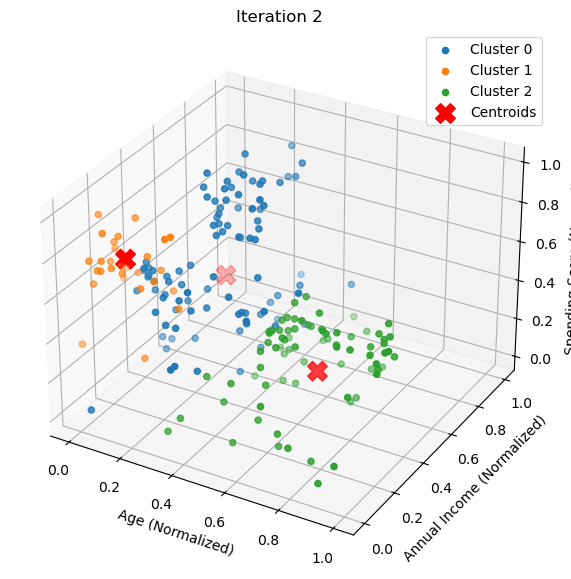

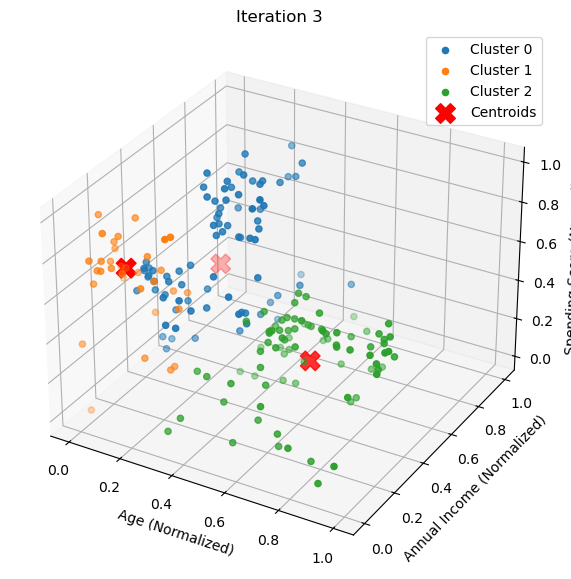

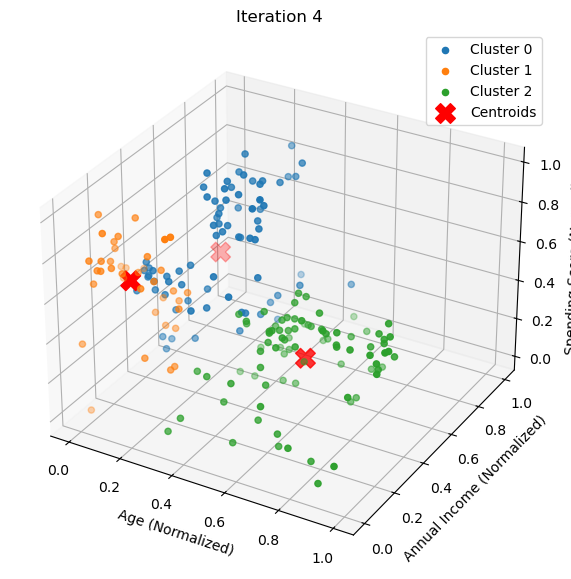

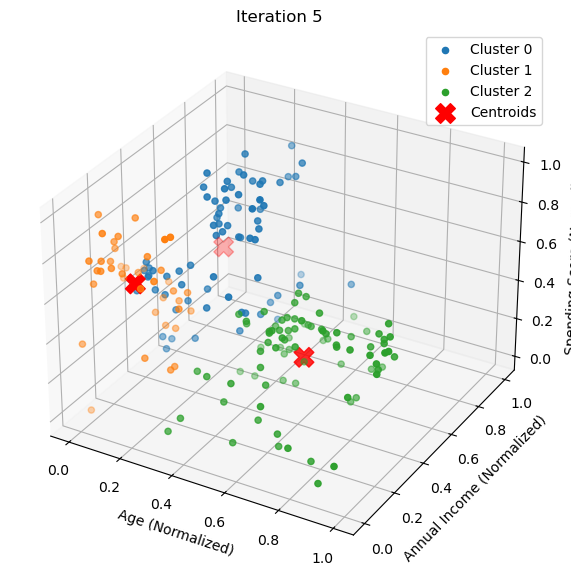

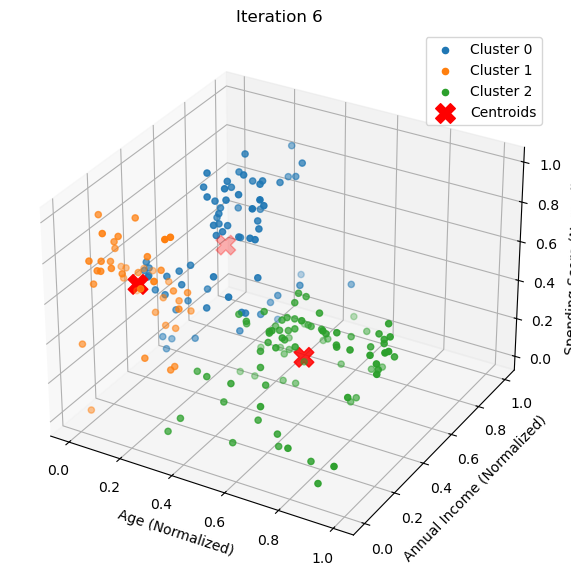

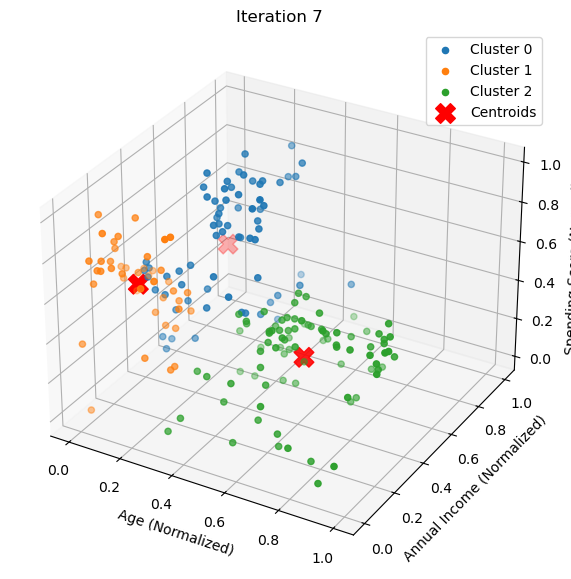

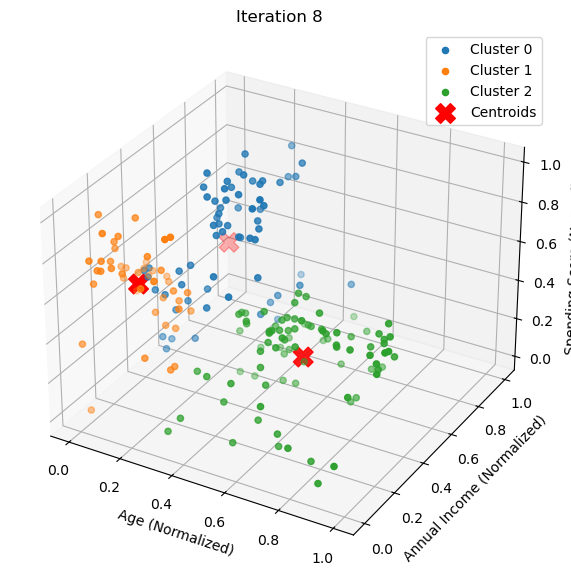

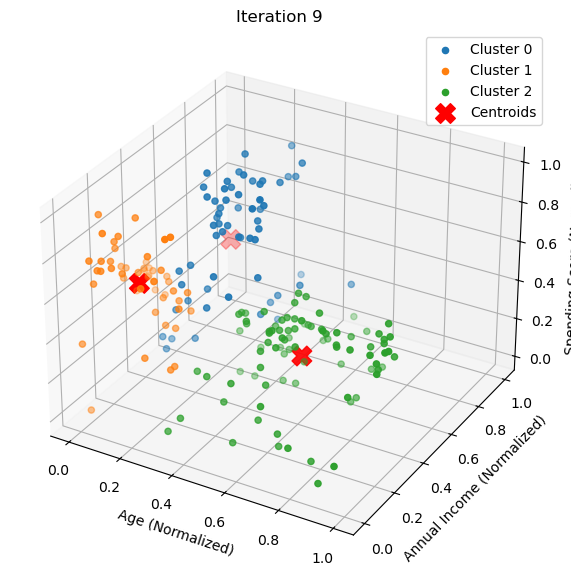

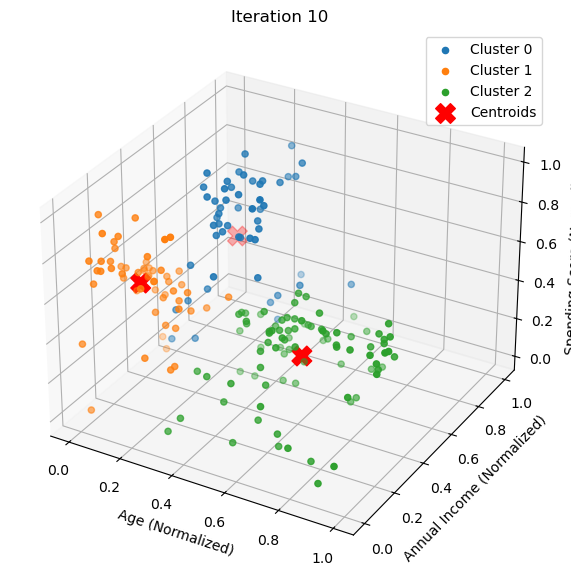

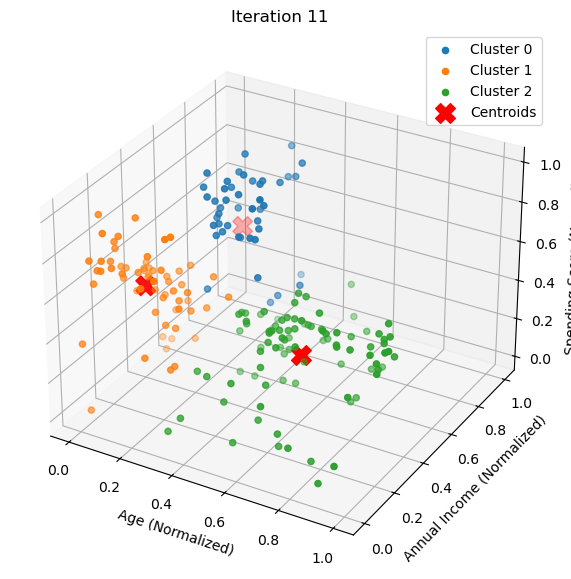

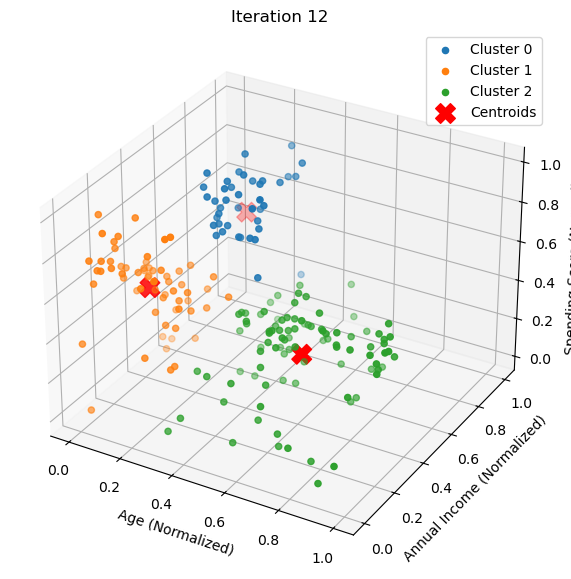

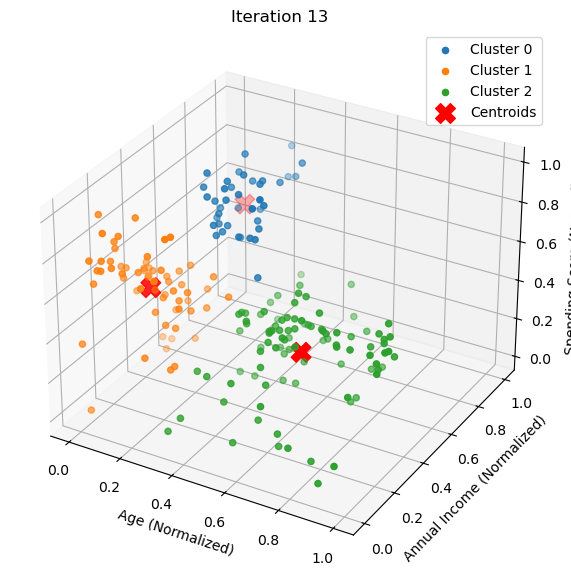

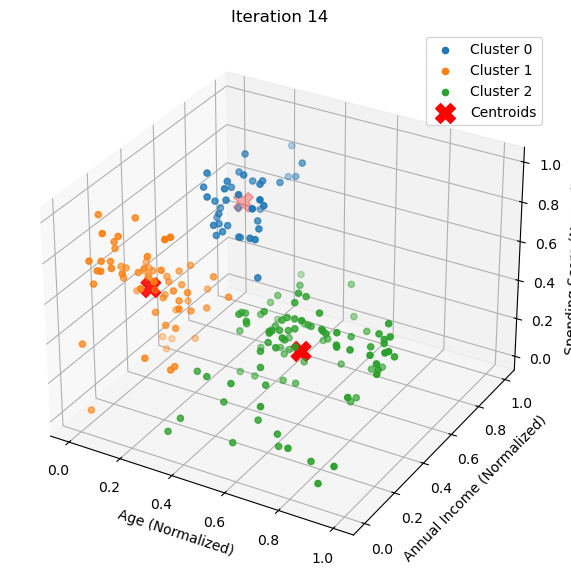

Converged in 14 iterations


In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time

def kmeans_clustering(data, k, maximum_itterations=300, tolerance=0.0001):
    """
    Perform KMeans clustering on the given data and visualize the convergence process in 3D.
    
    Parameters:
    - data: A 2D array of data points.
    - k: Number of clusters.
    - maximum_itterations: Maximum number of iterations (int).
    - tolerance: Tolerance for convergence (float).
    
    Returns:
    - final_centroids: Centroid coordinates after convergence or maximum_itterations.
    - final_labels: Cluster labels for each data point.
    """
    # Step 1: Initializing centroids randomly from the data points
    np.random.seed(42)  # For reproducibility
    initial_indices = np.random.choice(data.shape[0], k, replace=False)
    centroids = data[initial_indices]

    for iteration in range(maximum_itterations):
        # Step 2: Assigning data points to the nearest centroid
        labels = assign_clusters(data, centroids)
        
        # Step 3: Visualizing the clusters and centroids
        plt.ion()
        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection='3d')
        
        for cluster in range(k):
            cluster_points = data[labels == cluster]
            ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {cluster}')
        
        ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], color='red', s=200, label='Centroids', marker='X')
        ax.set_title(f'Iteration {iteration + 1}')
        ax.set_xlabel('Age (Normalized)')
        ax.set_ylabel('Annual Income (Normalized)')
        ax.set_zlabel('Spending Score (Normalized)')
        plt.legend()
        plt.show()
        
        # Step 4: Updating centroids based on cluster assignments
        new_centroids = update_centroids(data, labels, k)
        
        # Step 5: Checking for convergence
        if has_converged(centroids, new_centroids, tolerance):
            print(f"Converged in {iteration + 1} iterations")
            break
        
        centroids = new_centroids  # Updating centroids for the next iteration
    
    return centroids, labels

# KMeans algorithm on normalized features with 3 features
final_centroids, final_labels = kmeans_clustering(normalized_features, k=3)

# Clusters Analysis

In [17]:
# Redefine cluster_statistics function
def cluster_statistics(data, labels):
    """
    Calculate statistical properties of each cluster.
    
    Parameters:
    - data: A 2D array of data points.
    - labels: A 1D array of cluster labels for each data point.
    
    Returns:
    - A DataFrame summarizing statistical properties (mean, std, min, max) for each cluster.
    """
    stats = []
    k = np.unique(labels).shape[0]  # Number of clusters
    
    for cluster in range(k):
        cluster_points = data[labels == cluster]
        stats.append({
            'Cluster': cluster,
            'Mean Age': np.mean(cluster_points[:, 0]),
            'Mean Annual Income': np.mean(cluster_points[:, 1]),
            'Mean Spending Score': np.mean(cluster_points[:, 2]),
            'Std Age': np.std(cluster_points[:, 0]),
            'Std Annual Income': np.std(cluster_points[:, 1]),
            'Std Spending Score': np.std(cluster_points[:, 2]),
            'Min Age': np.min(cluster_points[:, 0]),
            'Max Age': np.max(cluster_points[:, 0]),
            'Min Annual Income': np.min(cluster_points[:, 1]),
            'Max Annual Income': np.max(cluster_points[:, 1]),
            'Min Spending Score': np.min(cluster_points[:, 2]),
            'Max Spending Score': np.max(cluster_points[:, 2]),
        })
    
    return pd.DataFrame(stats)

cluster_stats = cluster_statistics(data[features_name].values, final_labels)
cluster_stats

,Cluster,Mean Age,Mean Annual Income,Mean Spending Score,Std Age,Std Annual Income,Std Spending Score,Min Age,Max Age,Min Annual Income,Max Annual Income,Min Spending Score,Max Spending Score
0,0,32.875000,86.100000,81.52500,3.809117,16.133506,9.874177,27,40,69,137,58,97
1,1,25.140625,43.796875,55.81250,5.510975,19.298785,21.938746,18,38,15,81,5,99
2,2,50.479167,61.093750,33.40625,10.138601,24.775273,17.576961,32,70,18,137,1,60


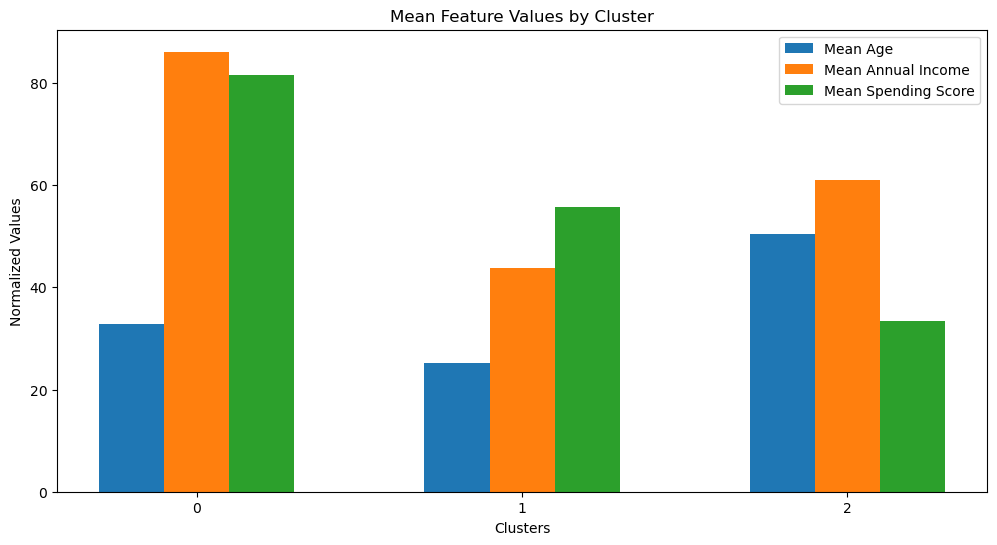

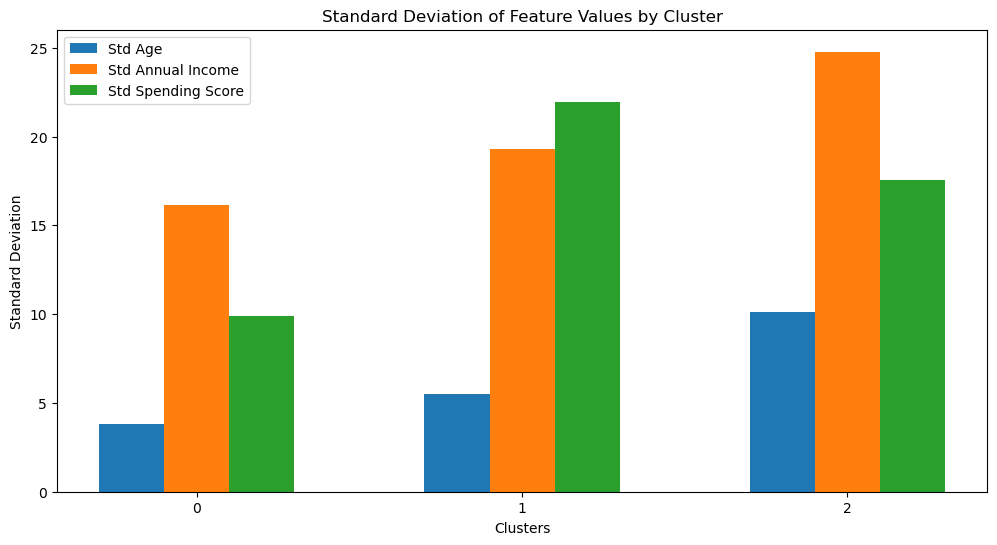

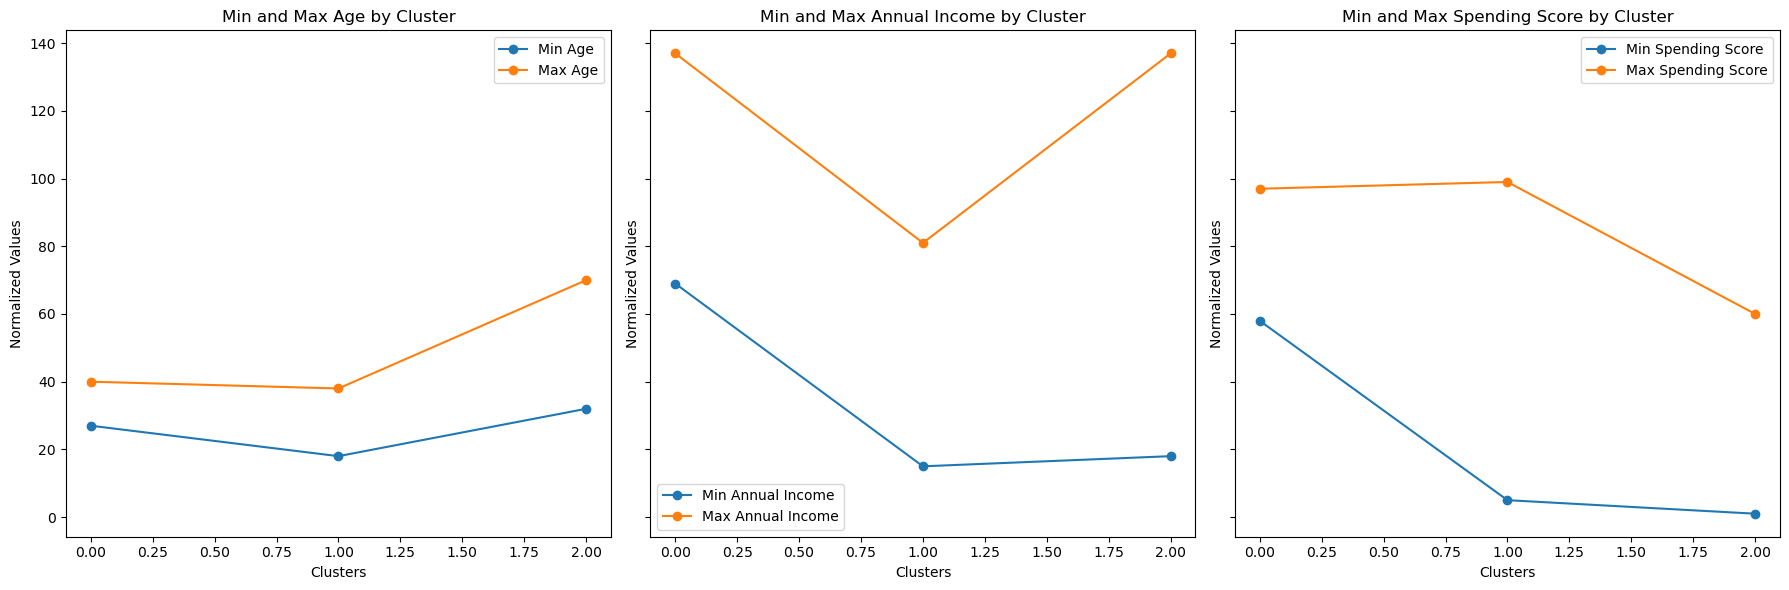

In [18]:
import matplotlib.pyplot as plt

def plot_cluster_statistics(stats):
    """
    Create interesting plots based on cluster statistics.
    
    Parameters:
    - stats: DataFrame containing statistical properties of each cluster.
    """
    clusters = stats['Cluster']
    
    # Plot mean values for each feature across clusters
    plt.figure(figsize=(12, 6))
    plt.bar(clusters - 0.2, stats['Mean Age'], width=0.2, label='Mean Age', align='center')
    plt.bar(clusters, stats['Mean Annual Income'], width=0.2, label='Mean Annual Income', align='center')
    plt.bar(clusters + 0.2, stats['Mean Spending Score'], width=0.2, label='Mean Spending Score', align='center')
    plt.title('Mean Feature Values by Cluster')
    plt.xlabel('Clusters')
    plt.ylabel('Normalized Values')
    plt.xticks(clusters)
    plt.legend()
    plt.show()

    # Plot standard deviation for each feature across clusters
    plt.figure(figsize=(12, 6))
    plt.bar(clusters - 0.2, stats['Std Age'], width=0.2, label='Std Age', align='center')
    plt.bar(clusters, stats['Std Annual Income'], width=0.2, label='Std Annual Income', align='center')
    plt.bar(clusters + 0.2, stats['Std Spending Score'], width=0.2, label='Std Spending Score', align='center')
    plt.title('Standard Deviation of Feature Values by Cluster')
    plt.xlabel('Clusters')
    plt.ylabel('Standard Deviation')
    plt.xticks(clusters)
    plt.legend()
    plt.show()

    # Plot min and max values for each feature for each cluster
    fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    features = ['Age', 'Annual Income', 'Spending Score']
    for i, feature in enumerate(features):
        axs[i].plot(clusters, stats[f'Min {feature}'], marker='o', label=f'Min {feature}')
        axs[i].plot(clusters, stats[f'Max {feature}'], marker='o', label=f'Max {feature}')
        axs[i].set_title(f'Min and Max {feature} by Cluster')
        axs[i].set_xlabel('Clusters')
        axs[i].set_ylabel('Normalized Values')
        axs[i].legend()
    plt.tight_layout()
    plt.show()

# Generate plots for the cluster statistics
plot_cluster_statistics(cluster_stats)

# Helping Material

1. [Some Methods for Classification and Analysis of Multivariate Observations by J. MacQueen (1967)](https://projecteuclid.org/euclid.bsmsp/1200512992)  
2. [KMeans++: The Advantages of Careful Seeding by Arthur and Vassilvitskii (2007)](https://theory.stanford.edu/~sergei/papers/kMeansPP-soda.pdf)  
3. [Understanding KMeans Clustering by Towards Data Science](https://towardsdatascience.com/understanding-kmeans-clustering-in-machine-learning-6a6e67336aa1)  
4. [KMeans Clustering in Python by GeeksforGeeks](https://www.geeksforgeeks.org/ml-k-means-algorithm/)  
5. [Comprehensive Guide to KMeans Clustering by Analytics Vidhya](https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-kmeans-clustering/)  
6. [Scikit-Learn Documentation on KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)  
7. [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)  